In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import ward, average, dendrogram, fcluster, single, complete
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

path = '../files/'

In [2]:
#Leitura do dataset filtrado
df = pd.read_csv( path + "4mula_filtered.csv" )
#Coleta do corpus filtrado
corpus = df['filtered_lyrics']
title = [(art + ' - ' + name) for art, name in zip(df['art_name'],df['music_name']) ]
corpus = corpus[0:1000]

In [3]:
corpus

0      ir nascer porque querer porque querer basto qu...
1      chapadão alquebrar cofre recordação pauterra r...
2      altar dentro mim erguer coração somente vidar ...
3      vidar parecer direção sentir correr contramão ...
4      conhecer bom amigo pensar nenhum casar amor qu...
                             ...                        
995    cada dia perder todo mágoa ganhar cada noite p...
996    ver jornal maior hospital portavoz banguebangu...
997    saber tudo viver tudo temer perder agora deixa...
998    mês junho nome saber tempo frio prazer nome fr...
999    leila daniel antônio soar leila precisar saber...
Name: filtered_lyrics, Length: 1000, dtype: object

In [4]:
tfidf = TfidfVectorizer(min_df = 5, max_df = 0.95, max_features = 8000)
tfidf.fit(corpus)
text = tfidf.transform(corpus)

In [5]:
hc = AgglomerativeClustering(n_clusters=10, affinity='cosine',linkage='average')

In [6]:
y_hc = hc.fit_predict(text.todense())
dist = 1 - cosine_similarity(text)
dist = dist - dist.min() # get rid of some pesky floating point errors that give neg. distance
linkage_matrix = ward(dist) # replace with complete, single, or other scipy.cluster.hierarchical algorithms

/home/renan/ic/tm_er/venv/lib/python3.8/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


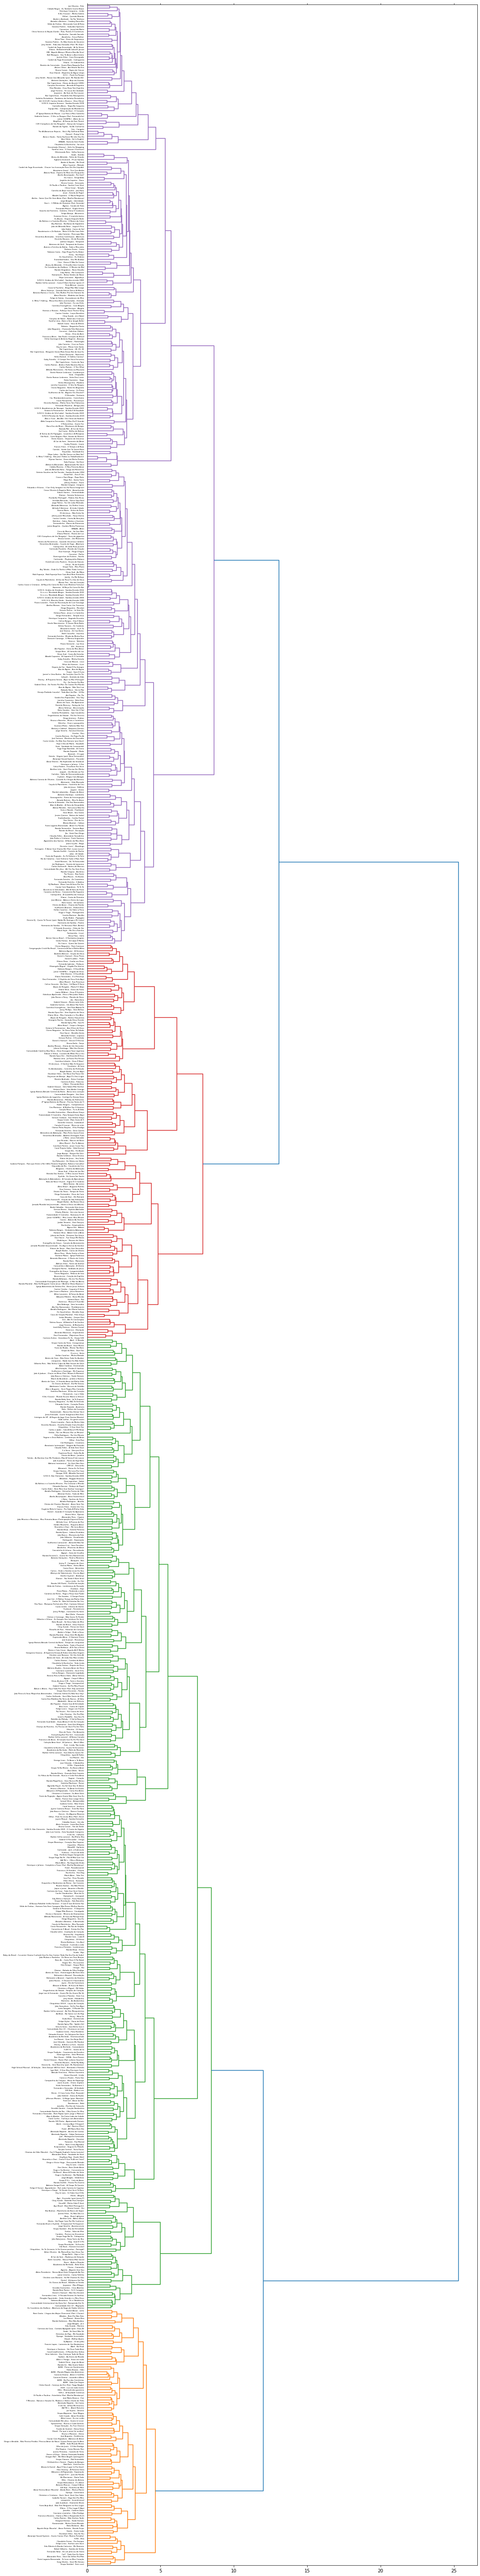

In [8]:
MAX_COPHENETIC_DIST = max(linkage_matrix[:,2]) * 0.39 # max distance between points to be considered together. can be tuned.

fig, ax = plt.subplots(figsize=(15, 80)) # set size
ax = dendrogram(linkage_matrix, orientation="right", color_threshold=MAX_COPHENETIC_DIST, leaf_font_size=4,
                labels=title[0:1000])

plt.tick_params(axis= 'x', which='both',  bottom='off', top='off',labelbottom='off')

plt.tight_layout() #show plot with tight layout
plt.savefig('ward_clusters_all.png', dpi=300)


In [9]:
from sklearn.metrics import silhouette_score

In [10]:
def silhouette_k(distance_matrix, linkage_matrix, max_k=20):
    scores = []
    for i in range(2, max_k+1):
        clusters = fcluster(linkage_matrix, i, criterion='maxclust')
        score = silhouette_score(distance_matrix, clusters, metric='precomputed')
        print("Silhouette score with {} clusters:".format(i), score)
        scores.append(score)
    plt.title("Silhouette score vs. number of clusters")
    plt.xlabel("# of clusters")
    plt.ylabel("Score (higher is better)")
    plt.plot(np.arange(2, max_k+1), scores)
    plt.show()
    return scores

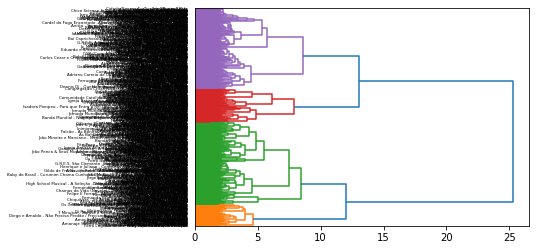

In [11]:
dendr = dendrogram(linkage_matrix, orientation="right", color_threshold=MAX_COPHENETIC_DIST, leaf_font_size=4,
                labels=title[0:1000])